# Group16_Batch1

# Domain : Tourism
## Dataset used : hotel_bookings.csv

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pickle
pd.options.display.max_columns = None

#### Suppressing warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##### Read the dataset to python environment

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 
                     'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


## Findings :

#### The given dataset is having 119390 rows and 32 columns. 
#### The below columns are having null values :
#### children : 4
#### country : 488
#### agent : 16340
#### company : 112593
#### We will handle these null values during pre-processing.

# Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdffaad6a10>,
      dtype=object)

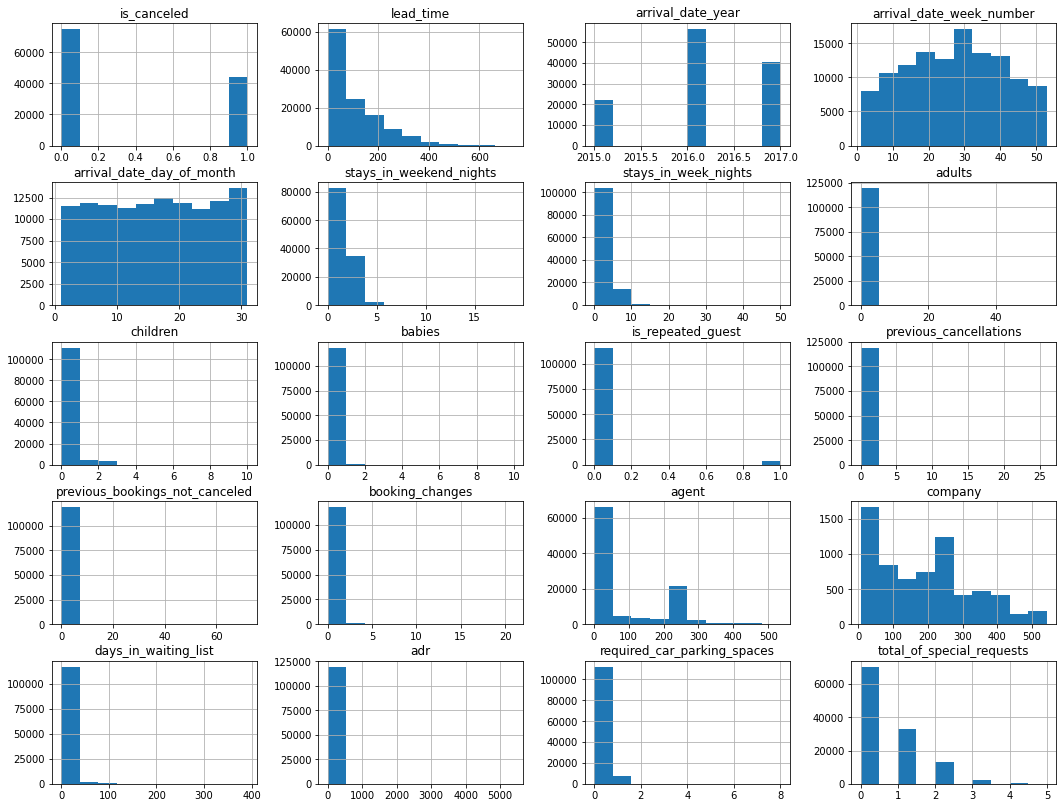

In [ ]:
# plotting histograms

df.hist(figsize=(18, 14))

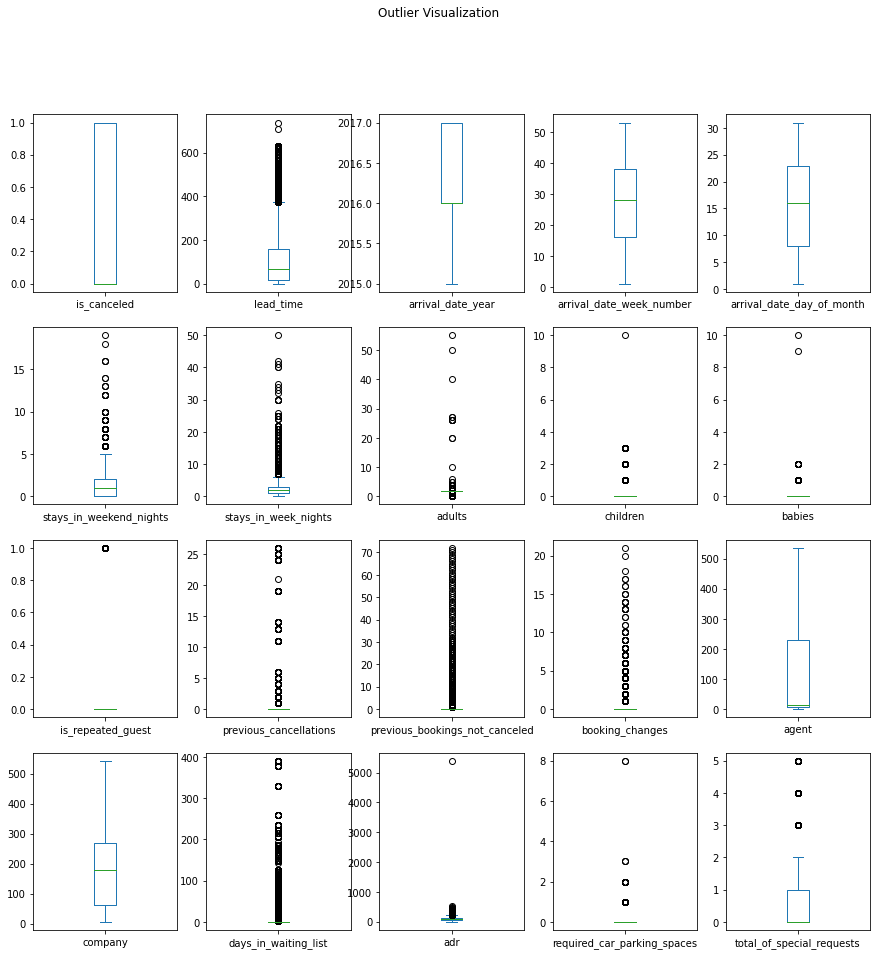

In [ ]:
# plotting boxplots

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

##### Here, we have plotted the boxplots. From this, we will be able to detect the outliers in the given dataset. We will handle these outliers during pre-processing.

## Hotel Types

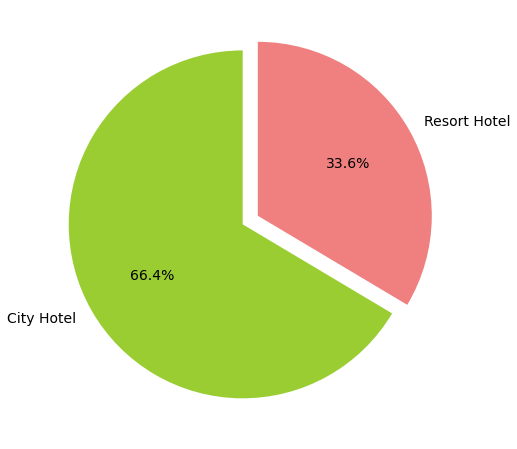

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

#### It seems that a huge proportion of choice of hotels was City hotel. Resort hotel tend to be on the expensive side and most people will just stick with City hotel.
#### Also, resort hotels tend to be appropriate for larger group of people.  
#### Let's have an overview of the number of people who booked the hotel.

In [ ]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [ ]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


#### It seems that mean values for adults and children are higher in the case of Resort Hotel. This means that Resort hotel is the better choice for large families.

### Booking cancellations

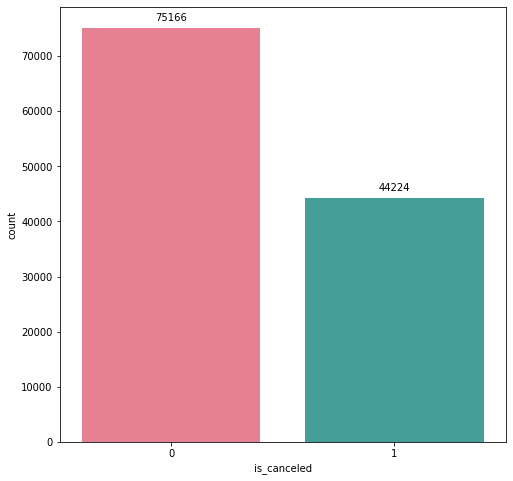

In [ ]:
#Canceled=1, Not canceled=0
canceled_data = df['is_canceled']
ax=sns.countplot(canceled_data, palette='husl')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### Majority of bookings were not canceled, still some half of the bookings were canceled.

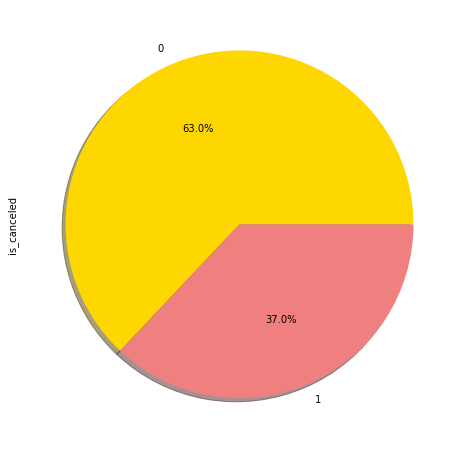

In [ ]:
cols = ['gold', 'lightcoral']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

#### According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled.

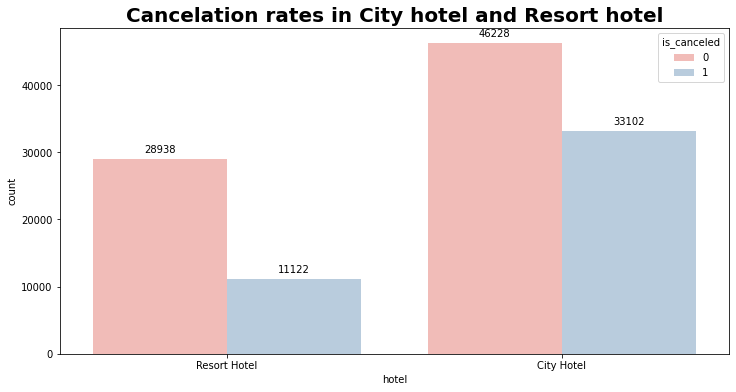

In [ ]:
plt.figure(figsize=(12, 6))

ax=sns.countplot(x='hotel',hue="is_canceled", data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

###### We have seen a huge proportion of cancellation from City hotel. This was expected since 3/4 of the hotel bookings belong to City hotel.

Text(0.5, 1.0, 'Arriving year, LeadTime and Cancelations')

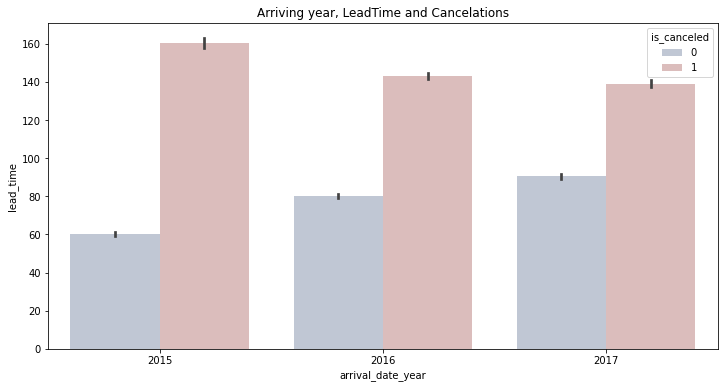

In [ ]:
# Cancellation rate based on lead_time vs arrival_date_year

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='vlag')
plt.title('Arriving year, LeadTime and Cancelations')

#### For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

## Country of visitors

In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
import folium
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

#### More visitors are from western europe, namely France, UK, and Portugal being the highest.
#### We can instruct the marketing team to target people of this region.

## Arrivals in month and year

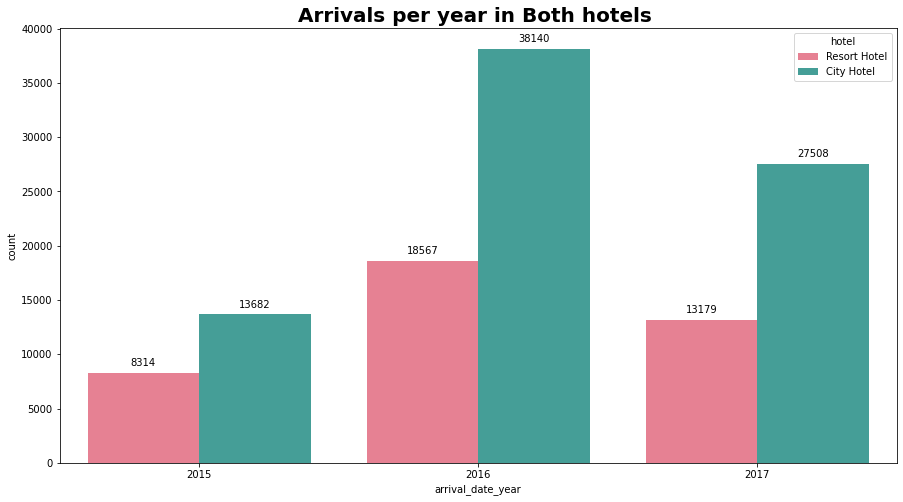

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.countplot(x='arrival_date_year',hue='hotel', data=df, palette='husl')
plt.title("Arrivals per year in Both hotels ", fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

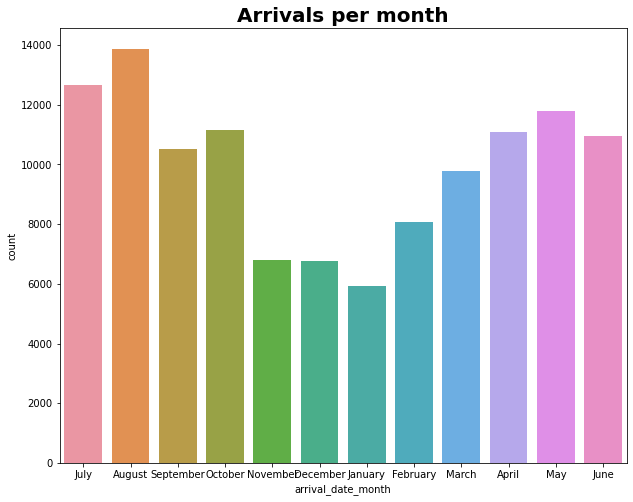

In [ ]:
plt.figure(figsize=(5, 8))
sns.countplot(data = df, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### We can see highest number of the bookings were in the year 2016 and bookings were majorly in City hotel.
#### Most bookings were done in the months of April, May, June, July, and August.

## Arrival Date

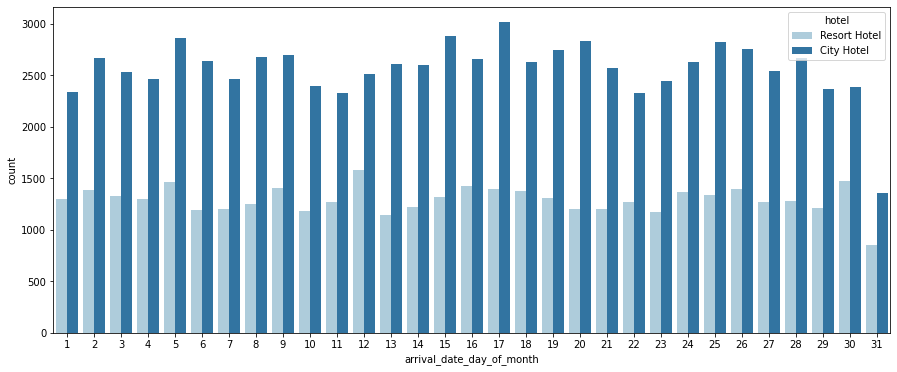

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

#### Month end day has very less arrival count when compared to the other days.
#### Majority of the bookings are in City hotel.

## Weekend Stay

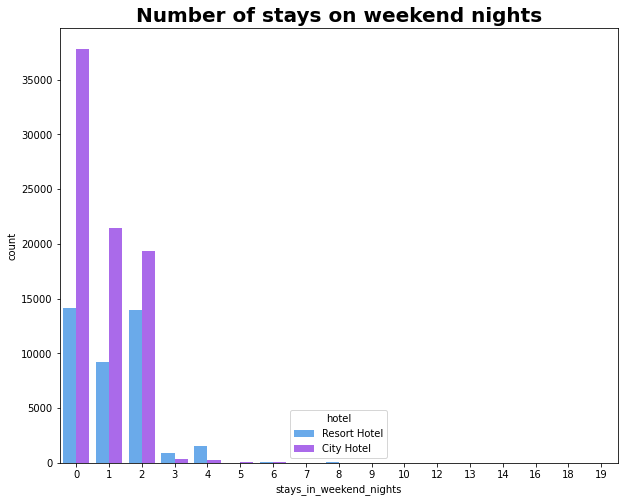

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights", fontweight="bold", size=20)
plt.show()

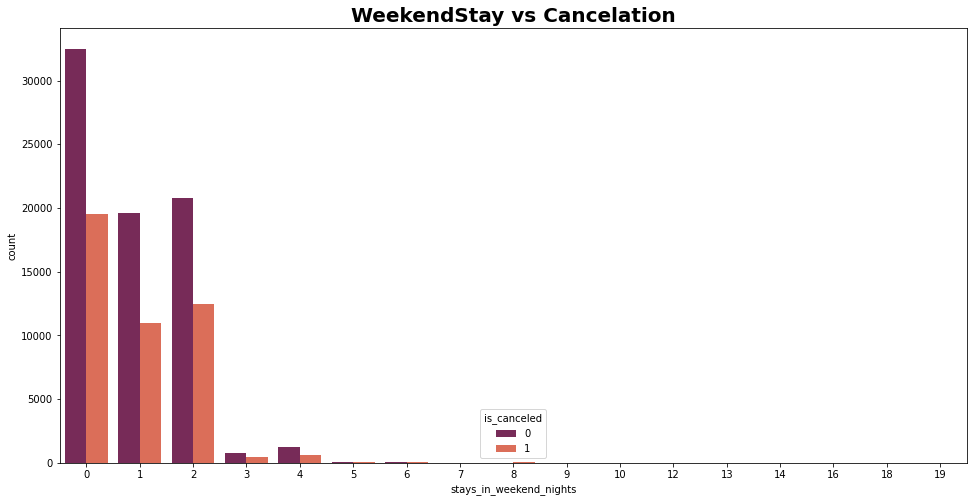

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation', fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### In the first graph, we can see that most of the weekend nights were booked in City Hotel.
#### The second plot shows that most of weekend nights which were booked were not canceled.

## Week Stay

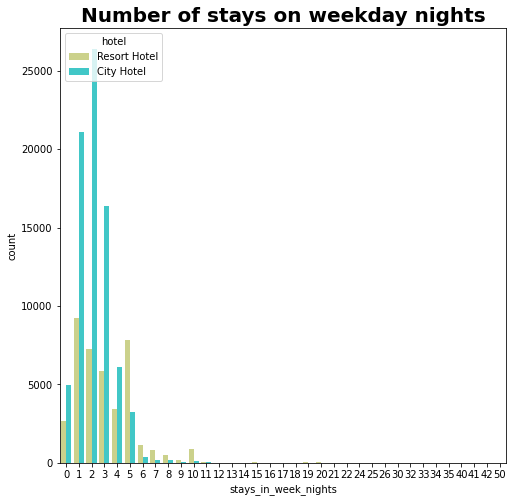

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.show()

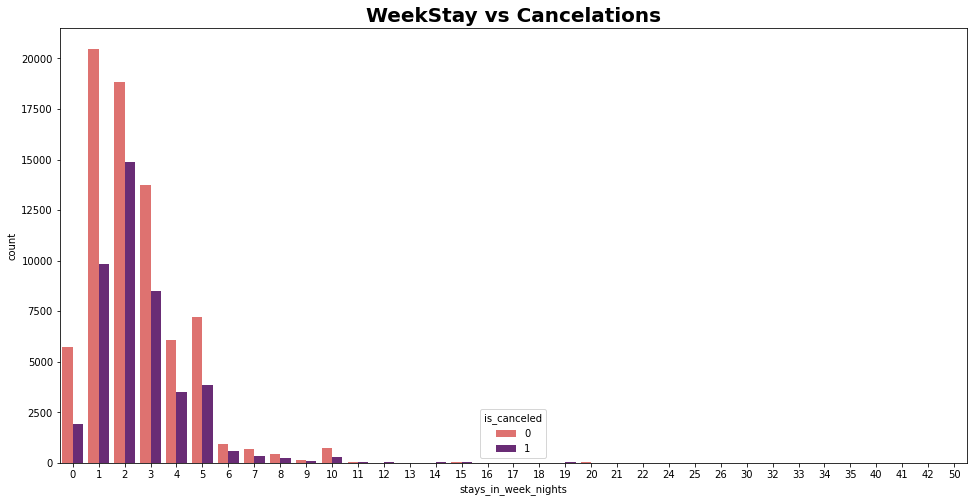

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

#### From the first graph, it can be seen that the weekday night stays were more in City Hotel.
#### From the second graph it can be seen that for the booked weekday stays, the cancellation rates are low .

# Cancellation across hotels in different months

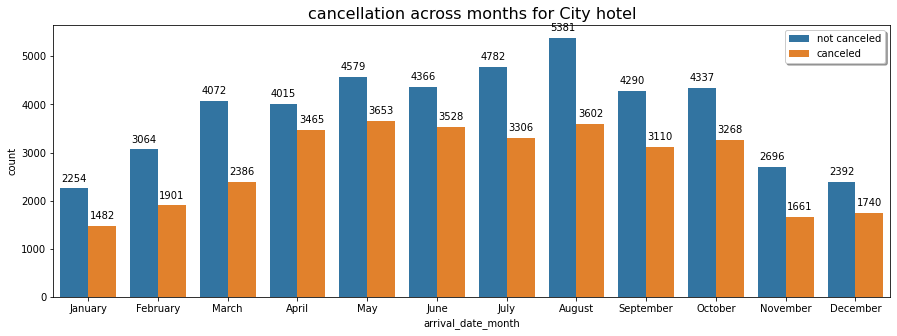

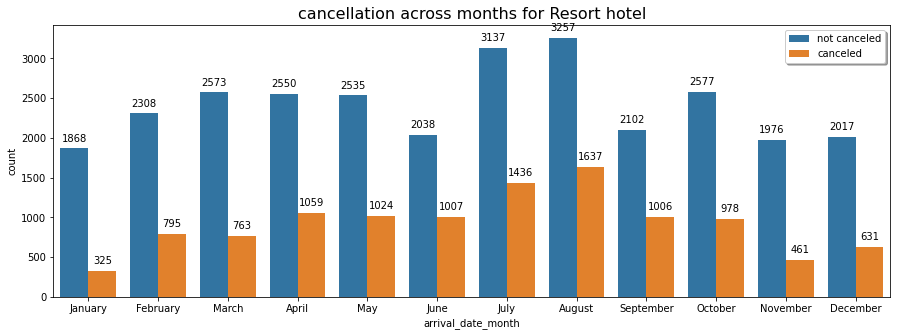

In [ ]:
#for city hotel
plt.figure(figsize=(15,5))
filter = df['hotel'] == 'City Hotel'
data = df[filter]
ax = sns.countplot(data=data,x='arrival_date_month',hue='is_canceled',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("cancellation across months for City hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow=True,loc=0)
plt.show()

#for resort hotel
plt.figure(figsize=(15,5))
filter = df['hotel'] == 'Resort Hotel'
data = df[filter]
ax = sns.countplot(data=data,x='arrival_date_month',hue='is_canceled',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("cancellation across months for Resort hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow=True,loc=0)
plt.show()

#### From the above two graphs its clear that the average cancellation is more in City hotel than in Resort hotel,which is an important factor in prediction.

## Category of Visitor

Text(0.5, 0.98, 'People distribution')

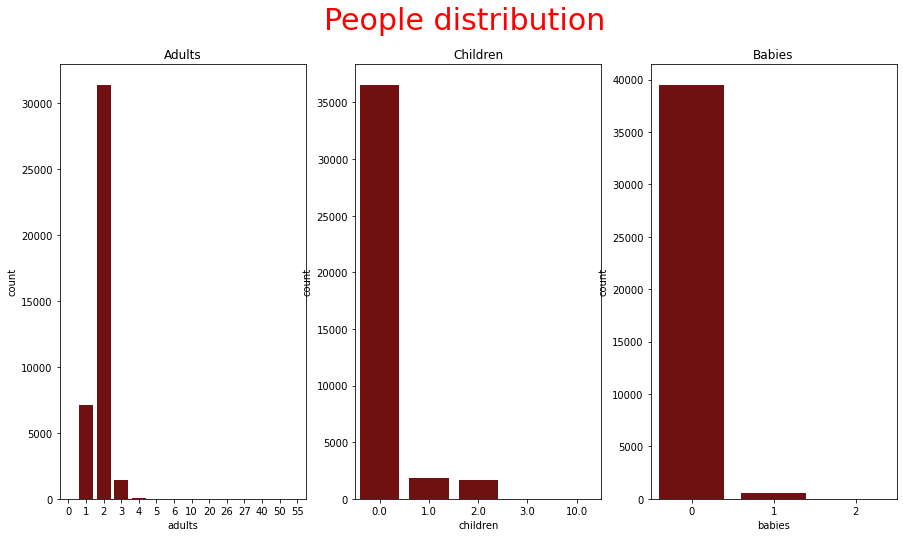

In [ ]:
family=['adults','children','babies']
fig,ax=plt.subplots(1,3,figsize=(15,8))

for i,f in enumerate(family):
    fig.sca(ax[i])
    sns.countplot(data=data,x=f,color='maroon')
    plt.title(f'{f.title()}')
fig.suptitle('People distribution',fontsize=30,color='red')

#### It seems that majority of the visitors travel in pair. Those who travel with children or babies have no specific preference for the type of hotel.

# Market Segments and Distribution Channels

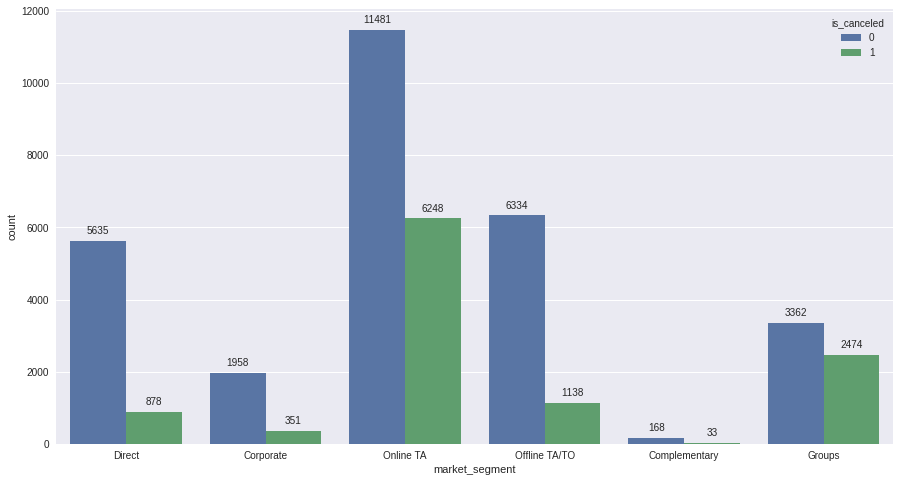

In [ ]:
plt.figure(figsize=(15, 8))
plt.style.use("seaborn")
ax = sns.countplot(data=data,x='market_segment',hue='is_canceled')
#ax = sns.countplot(x="market_segment", hue="is_canceled", data=data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

Text(0.5, 1.0, 'Types of distribution channel')

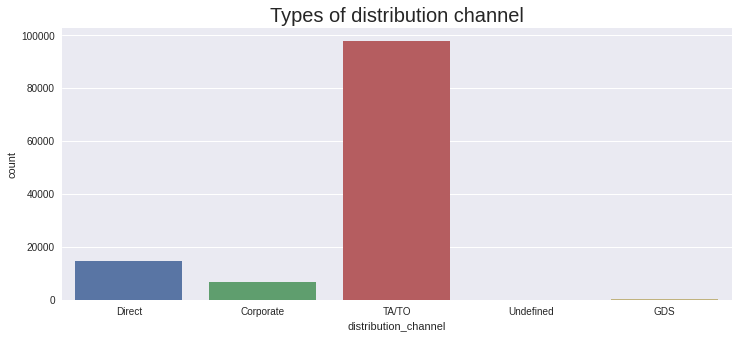

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

#### Majority of the distribution channels and market segments involve travel agencies (online or offline).
#### We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

### Deposit Type

In [ ]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

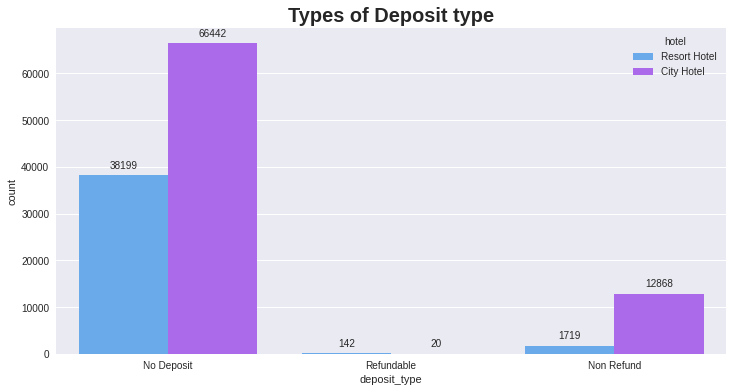

In [ ]:
plt.figure(figsize=(12, 6))

ax=sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type', fontweight="bold", size=20)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### There were no deposit for City Hotel whereas Resort Hotel had some deposits. No deposit may lead to the cancellation of the bookings.

## Guest Repetition

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

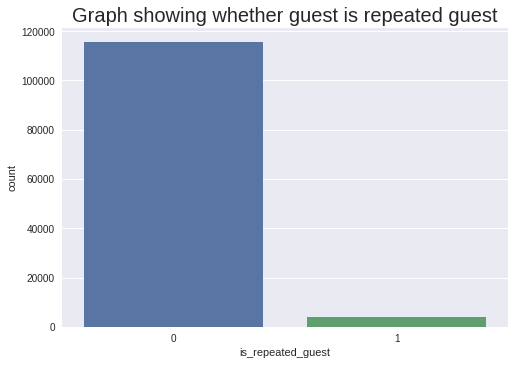

In [ ]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

#### Extremely low count of repeated guests. This needs to be investigated further to find the reason for having low count of repeated guests.
#### A need to target repeated guests since they have booked before.

## Types of Guests

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0.5, 1.0, 'Graph showing type of guest')

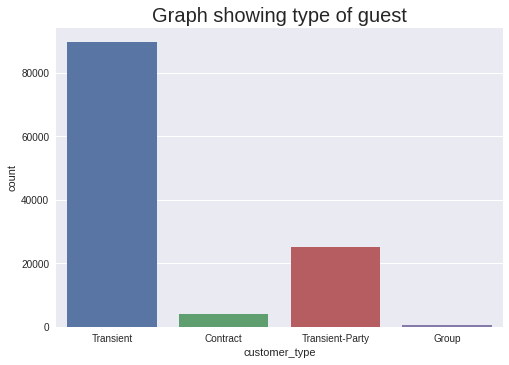

In [ ]:
sns.countplot(data = df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

#### Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response for their bookings.

# Average Daily Rate (ADR) year-wise (Bi-variate Analysis)

Text(0, 0.5, 'adr')

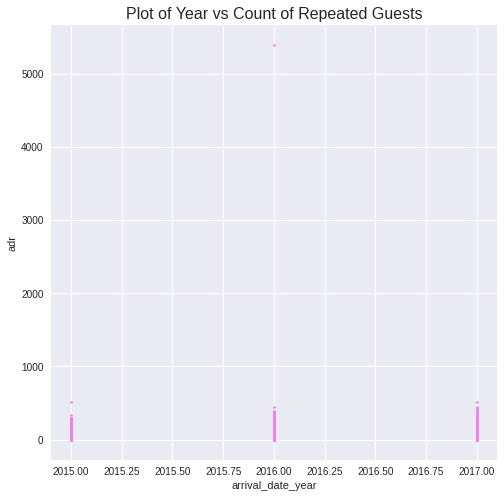

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['arrival_date_year'], df['adr'], s=5, c='violet')
plt.title('Plot of Year vs Count of Repeated Guests', fontsize = 16)
plt.xlabel('arrival_date_year')
plt.ylabel('adr')

#### From the above graph, it is evident that there is an increase in ADR from 2015 to 2017.

# Average Daily Rate (ADR) month-wise

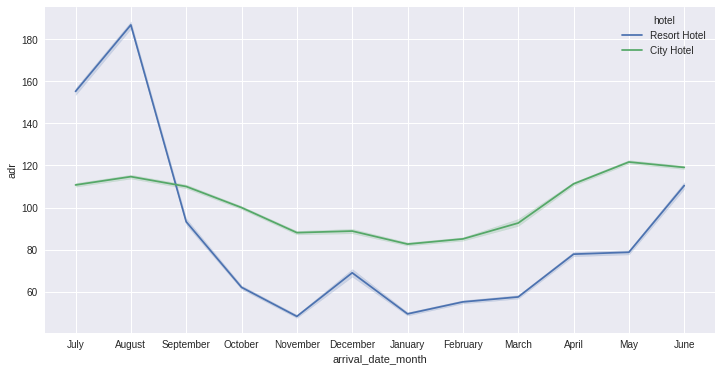

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

### For Resort hotel, the average daily rate is more expensive during July, August, and September.
#### For City hotel, the average daily rate is more expensive during May, June, July, and August.
#### It seems like the hotels are more expensive in the months of July and August.

## Insights :

#### By performing EDA on the given dataset, we have found the below insights :
#### Almost 35% of bookings were canceled. Need to find ways to reduce the cancellation rates.
#### Majority of the hotels booked are City hotel. Definitely need to spend the most targeting fund on that hotel.
#### Most bookings were made from July to August. And the least bookings were made at the start and end of the year. We should target these months. Those are peak months due to the summer period.
#### Portugal, the UK, France, Spain and Germany are the top countries from where most of the guests come with more than 80% of total guests coming from these 5 countries. That is, majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
#### We also realise that the high rate of cancellations can be due high no deposit policies. This needs to be amended.
#### Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

### Strategies to counter high cancellation rate at the hotels :
#### Set non-refundable rates, collect deposits, and implement more rigid cancellation policies.
#### Encourage direct bookings by offering special discounts.
#### Monitor where the cancellations are coming from such as Market Segments, Distribution Channels, etc.,

# DATA PRE-PROCESSING

## 1) Handling Null Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

We have 4 features with missing values as follows.

company - 112593,
agent - 16340,
country - 488,
children - 4.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [ ]:
## If id of agent or company is null, just replace it with 0

df[['agent','company']] = df[['agent','company']].fillna(0.0)

Country column contains country codes representing different countries. It is a categorical feature so we will replace it with the mode value. The mode value is the value that appears more than any other value. Hence here we are replacing it with the country that appears the most often.


In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)

df['country'].fillna(df.country.mode().to_string(), inplace=True)

Children column contains the count of children. Let's plot a histogram to check the skewness.

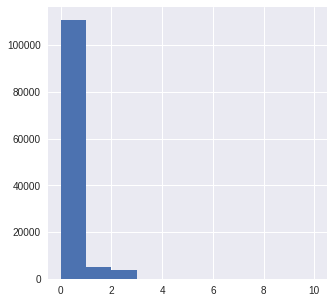

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(df['children'])
plt.show()

#### We could replace the missing values here with the median since the histogram is right skewed.

In [ ]:
df['children']=df['children'].fillna(df['children'].median())

In [ ]:
# Check to see if there are any more NaN data 

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now we have handled all the null values which were present in our dataset.

## 2) HANDLING OUTLIERS

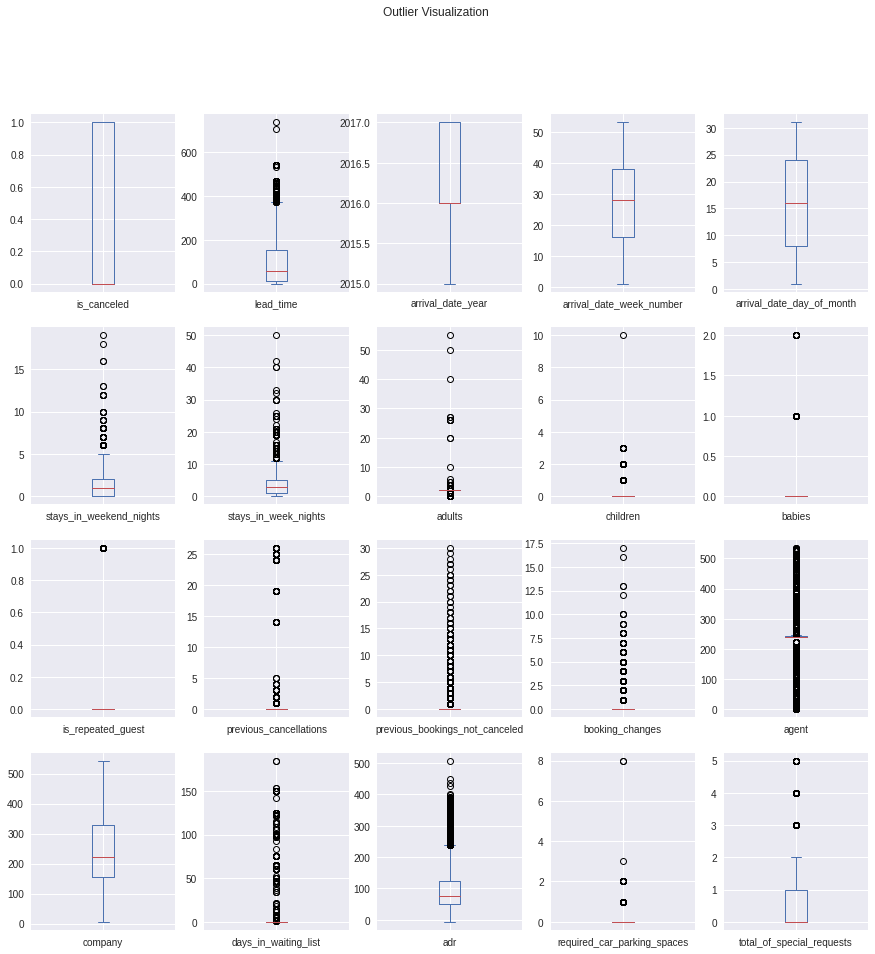

In [ ]:
#plotting boxplot

data.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

We have identified the presence of outliers in lead_time,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations, previous_booking_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_ of_special_requests.

We will be handling outliers in these features in such a way to reduce data loss.


In [ ]:
#finding the 25th percentile and 75th percentile.
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

 #Inter Quantile Range
IQR=Q3-Q1

#finding lower and upper  bounds for all values.All values outside these bounds are outliers.
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
#finding the sum of the outliers in each column of int and float types.
((df.select_dtypes(include=['float64','int64'])<lower_limit) | (df.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

is_canceled                           0
lead_time                          3005
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             265
stays_in_week_nights               3354
adults                            29710
children                           8590
babies                              917
is_repeated_guest                  3810
previous_cancellations             6484
previous_bookings_not_canceled     3620
booking_changes                   18076
agent                              1254
company                            6797
days_in_waiting_list               3698
adr                                3793
required_car_parking_spaces        7416
total_of_special_requests          2877
dtype: int64

Text(0.5, 1.0, 'Box Plot of lead time')

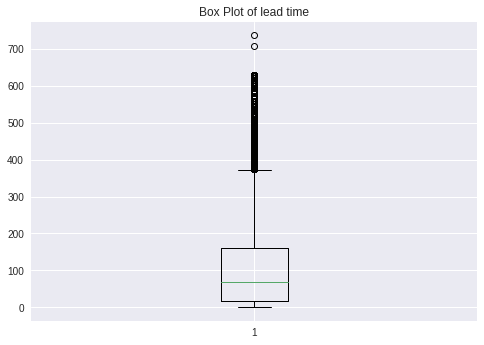

In [ ]:
#case 1: lead_time
#checking the outlier in Lead time
plt.boxplot(df['lead_time'])
plt.title('Box Plot of lead time')

In [ ]:
Q1=np.percentile(df['lead_time'],25,interpolation='midpoint')
Q2=np.percentile(df['lead_time'],50,interpolation='midpoint')   
Q3=np.percentile(df['lead_time'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

18.0
69.0
160.0
-195.0
373.0


In [ ]:
#removing outlier using for loop
outlier=[]
for x in df['lead_time']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

3005

Text(0.5, 1.0, 'Box plot of lead time')

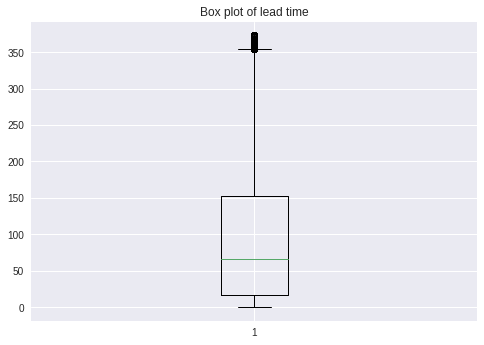

In [ ]:
#Removing the outliers
ind1=df['lead_time']>up_lim
df.loc[ind1].index
df.drop(df.loc[ind1].index,inplace=True)
plt.boxplot(df['lead_time'])
plt.title('Box plot of lead time')

Text(0.5, 1.0, 'Box Plot of adr')

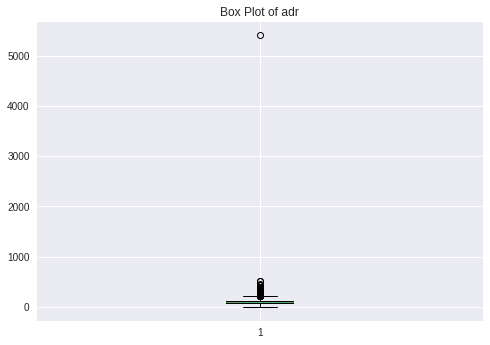

In [ ]:
#case 2:  adr 
#checking the outlier in adr
plt.boxplot(df['adr'])
plt.title('Box Plot of adr')   

In [ ]:
Q1=np.percentile(df['adr'],25,interpolation='midpoint')
Q2=np.percentile(df['adr'],50,interpolation='midpoint')   
Q3=np.percentile(df['adr'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

70.0
95.0
126.6
-14.899999999999991
211.5


In [ ]:
#removing outlier using for loop
outlier=[]
for x in df['adr']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

3768

Text(0.5, 1.0, 'Box Plot of adr')

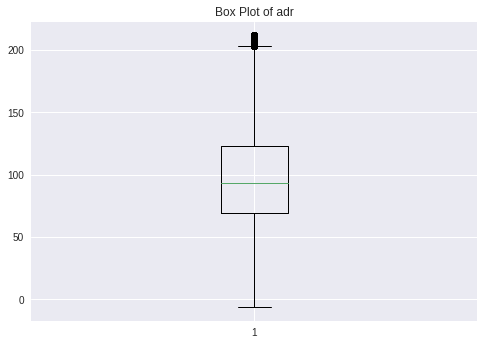

In [ ]:
#Removing the outliers
ind12=df['adr']>up_lim
df.loc[ind12].index
df.drop(df.loc[ind12].index,inplace=True)
plt.boxplot(df['adr'])
plt.title('Box Plot of adr')  

In [ ]:
## drop data where  adr <= 0 
data = data[ data['adr'] > 0 ].copy()

Text(0.5, 1.0, 'Box Plot of total of special requests')

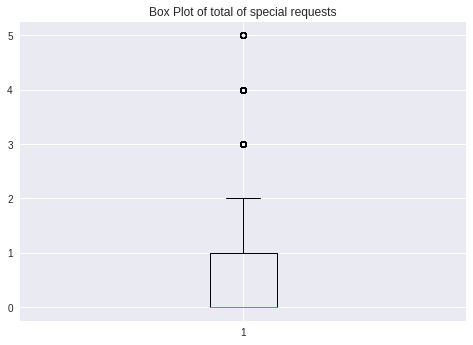

In [ ]:
#case 3: total_of_special_requests
#checking the outlier in total_of_special_requests
plt.boxplot(df['total_of_special_requests'])
plt.title('Box Plot of total of special requests')  

In [ ]:
Q1=np.percentile(df['total_of_special_requests'],25,interpolation='midpoint')
Q2=np.percentile(df['total_of_special_requests'],50,interpolation='midpoint')   
Q3=np.percentile(df['total_of_special_requests'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [ ]:
#removing outlier using for loop
outlier=[]
for x in df['total_of_special_requests']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

2646

Text(0.5, 1.0, 'Box Plot of total of special requests')

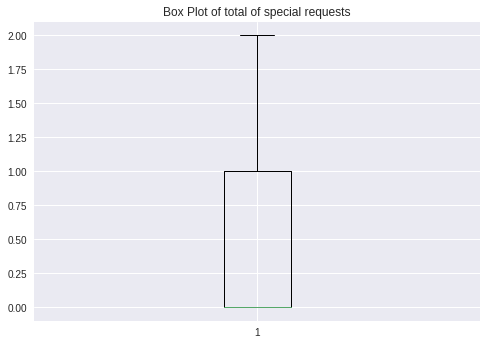

In [ ]:
#Removing the outliers
ind14=df['total_of_special_requests']>up_lim
df.loc[ind14].index
df.drop(df.loc[ind14].index,inplace=True)
plt.boxplot(df['total_of_special_requests'])
plt.title('Box Plot of total of special requests')  

In [ ]:
df.shape

(109971, 32)

### Concatenation

#### There are many rows that have zero guests including adults, children and babies. These kind of rows are of no use.

In [ ]:
df[(df.adults+df.babies+df.children)==0].shape

(176, 32)

There are 176 such rows. Since they are of no use, we will just remove these rows.

In [ ]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
df.shape

(109795, 32)

# Converting Datatype

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.¶


There are some columns like children, company, and agent, that are float type but their values are only in integers.
So we will convert them to the integer type.

In [ ]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# 3) Feature Selection and Feature Engineering

Before going ahead with the creation of a predictive model, let’s perform the Feature Selection and Feature Engineering. As part of this, we will create more relevant features and remove irrelevant or less important features. Feature engineering is of high importance and at the same time a very difficult one.

Let's create some new features.

We have two features in our dataset reserved_room_type and another is assigned_room_type. We will make the new feature : let’s call it Room, which will contain 1 if the guest was assigned the same room that was reserved, else 0. Guest can cancel the booking if he did not get the same room. What do you think about it ? It's a decisive feature in booking cancellation by a guest right?

Another feature will be net_cancelled : it will contain 1 If the current customer has canceled more bookings in the past than the number of bookings he did not cancel, else 0.

The third feature will be total_no_of_guests : the features adults, babies, and children are combined together to form this new feature.

In [ ]:
## Make the new column : 'Room' which will contain 1 if guest received the same room which was reserved, otherwise 0.

df['Room'] = 0
df.loc[df['reserved_room_type'] == df['assigned_room_type'] , 'Room'] = 1

## Making the new column : 'net_cancelled' which will contain 1 if the guest has cancelled more bookings in the past than the number of bookings he/she did not cancel, otherwise 0

df['net_cancelled'] = 0
df.loc[ df['previous_cancellations'] > df['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

## Making the new column total_number_of_guests

df['total_no_guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day


# 4) Feature Reduction

#### Now let's remove the unnecessary features.

In [ ]:
df= df.drop(['assigned_room_type','reserved_room_type', 'previous_cancellations','previous_bookings_not_canceled','adults', 'children', 'babies'],axis=1)

Let’s also remove the reservation_status. Even though it is a very important feature, it already has the information about canceled booking. Furthermore, it can only have the data after the booking was canceled or the guest checked in. So it will not be useful to use this feature in our predictive model. Because for the future prediction we won’t have the information about the reservation status.

In [ ]:
# Remove reservation_status column, because it tells us if booking was cancelled.

df = df.drop(['reservation_status'], axis=1)

In [ ]:
## remove the leftover columns. 
df= df.drop(['booking_changes','reservation_status_date'],axis=1)

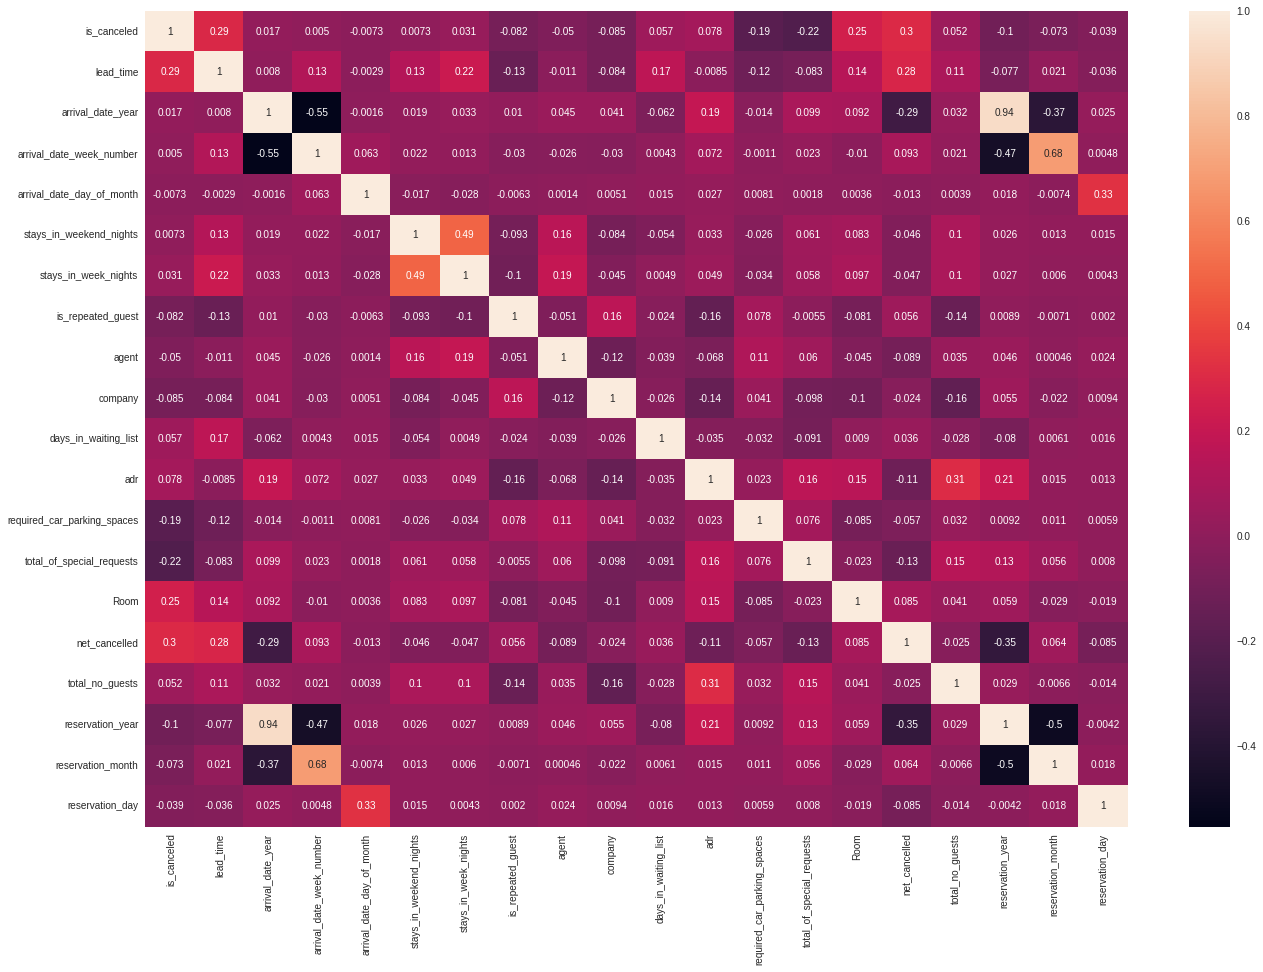

In [ ]:
# plottting the heatmap in order to see the correlation.

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, ax=ax);

We can see our new features - Room and net_cancelled have a higher correlation with is_canceled than most of the other columns.

## 5) ENCODING - Converting Categorical variables to Numerical

#### Let’s convert categorical values into numerical form. 
#### We will use LabelEncoder from sklearn library for the encoding purpose.

In [ ]:
df.shape

(109795, 28)

In [ ]:
import pickle

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['country'] = le.fit_transform(df['country'])
pickle.dump(le, open('countryEncoder.pkl', 'wb'))

df['deposit_type'] = le.fit_transform(df['deposit_type'])
pickle.dump(le, open('depositEncoder.pkl', 'wb'))


In [ ]:
dict1 = {'April': 4, 'August': 8, 'December': 12, 'February': 2, 'January': 1, 'July': 7, 'June': 6, 'March': 5, 'May': 8, 'November': 11, 'October': 10, 'September': 9}
df=df.replace({"arrival_date_month": dict1})
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,total_no_guests,reservation_year,reservation_month,reservation_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,BB,133,Direct,Direct,0,0,0,0,0,Transient,0.0,0,0,1,0,2,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,BB,57,Direct,Direct,0,0,0,0,0,Transient,75.0,0,0,0,0,1,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,BB,57,Corporate,Corporate,0,0,304,0,0,Transient,75.0,0,0,1,0,1,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,BB,57,Online TA,TA/TO,0,0,240,0,0,Transient,98.0,0,1,1,0,2,2015,7,3
5,Resort Hotel,0,14,2015,7,27,1,0,2,BB,57,Online TA,TA/TO,0,0,240,0,0,Transient,98.0,0,1,1,0,2,2015,7,3


In [ ]:
df[['country','deposit_type','arrival_date_month']] = df[['country','deposit_type','arrival_date_month']].astype('int64')

In [ ]:
#let's find the categorical features

list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,total_no_guests,reservation_year,reservation_month,reservation_day
0,1,0,342,2015,7,27,1,0,0,0,133,3,1,0,0,0,0,0,2,0.0,0,0,1,0,2,2015,7,1
2,1,0,7,2015,7,27,1,0,1,0,57,3,1,0,0,0,0,0,2,75.0,0,0,0,0,1,2015,7,2
3,1,0,13,2015,7,27,1,0,1,0,57,2,0,0,0,304,0,0,2,75.0,0,0,1,0,1,2015,7,2
4,1,0,14,2015,7,27,1,0,2,0,57,6,3,0,0,240,0,0,2,98.0,0,1,1,0,2,2015,7,3
5,1,0,14,2015,7,27,1,0,2,0,57,6,3,0,0,240,0,0,2,98.0,0,1,1,0,2,2015,7,3


In [ ]:
df.dtypes

hotel                            int64
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_week_number         int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
meal                             int64
country                          int64
market_segment                   int64
distribution_channel             int64
is_repeated_guest                int64
deposit_type                     int64
agent                            int64
company                          int64
days_in_waiting_list             int64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
Room                             int64
net_cancelled                    int64
total_no_guests                  int64
reservation_year         

We have encoded all the categorical variables into numerical form using LabelEncoder.

In [ ]:
# Splitting dataset into x and y
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)

In [ ]:
X.describe()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,total_no_guests,reservation_year,reservation_month,reservation_day
count,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000,109795.000000
mean,0.329969,96.103447,2016.133904,6.960171,26.886989,15.753941,0.924632,2.484630,0.551501,90.729587,4.926381,2.579525,0.032224,0.119459,72.648481,11.533121,2.115825,2.137921,97.294034,0.060340,0.508703,0.871397,0.051341,1.933230,2016.078947,6.271005,15.593934
std,0.470204,93.209583,0.708666,2.956496,13.779999,8.777786,0.991417,1.894298,1.074292,44.612195,1.272090,0.916959,0.176594,0.328681,106.093641,55.673380,14.566247,0.582052,40.551193,0.241383,0.687815,0.334762,0.220694,0.692967,0.709079,3.392723,8.794719
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,1.000000,1.000000
25%,0.000000,17.000000,2016.000000,5.000000,16.000000,8.000000,0.000000,1.000000,0.000000,54.000000,4.000000,3.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,68.685000,0.000000,0.000000,1.000000,0.000000,2.000000,2016.000000,3.000000,8.000000
50%,0.000000,67.000000,2016.000000,8.000000,27.000000,16.000000,1.000000,2.000000,0.000000,79.000000,5.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,92.940000,0.000000,0.000000,1.000000,0.000000,2.000000,2016.000000,6.000000,16.000000
75%,1.000000,153.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,0.000000,133.000000,6.000000,3.000000,0.000000,0.000000,134.000000,0.000000,0.000000,2.000000,121.500000,0.000000,1.000000,1.000000,0.000000,2.000000,2017.000000,9.000000,23.000000
max,1.000000,373.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,40.000000,4.000000,174.000000,7.000000,4.000000,1.000000,2.000000,535.000000,541.000000,259.000000,3.000000,211.500000,8.000000,2.000000,1.000000,1.000000,55.000000,2017.000000,12.000000,31.000000


## 6) Feature Scaling - StandardScaler

In [ ]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05,1.097950e+05
mean,2.047451e-13,-1.758619e-15,1.131966e-13,-2.191653e-15,3.118067e-15,5.396536e-16,1.908240e-14,-1.645011e-13,-3.068731e-14,-1.625681e-14,6.868038e-14,7.778889e-15,3.273872e-14,5.837808e-14,1.292114e-13,-2.091813e-14,-5.651882e-15,1.431042e-14,-6.413417e-16,1.154538e-13,-1.644660e-14,-1.073365e-14,-8.457597e-14,7.498943e-15,-1.313346e-13,-1.121181e-14,-6.538342e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-7.017616e-01,-1.031052e+00,-1.600062e+00,-2.015967e+00,-1.878600e+00,-1.680835e+00,-9.326415e-01,-1.311643e+00,-5.133643e-01,-2.033749e+00,-3.872686e+00,-2.813143e+00,-1.824736e-01,-3.634513e-01,-6.847612e-01,-2.071578e-01,-1.452560e-01,-3.673094e+00,-2.556633e+00,-2.499758e-01,-7.395952e-01,-2.603046e+00,-2.326364e-01,-1.346722e+00,-2.931910e+00,-1.553628e+00,-1.659405e+00
25%,-7.017616e-01,-8.486660e-01,-1.889532e-01,-6.630079e-01,-7.900609e-01,-8.833636e-01,-9.326415e-01,-7.837402e-01,-5.133643e-01,-8.233120e-01,-7.282390e-01,4.585552e-01,-1.824736e-01,-3.634513e-01,-6.187815e-01,-2.071578e-01,-1.452560e-01,-2.369571e-01,-7.055073e-01,-2.499758e-01,-7.395952e-01,3.841653e-01,-2.326364e-01,9.635401e-02,-1.113380e-01,-9.641283e-01,-8.634692e-01
50%,-7.017616e-01,-3.122381e-01,-1.889532e-01,3.517115e-01,8.201098e-03,2.803209e-02,7.602057e-02,-2.558376e-01,-5.133643e-01,-2.629245e-01,5.787278e-02,4.585552e-01,-1.824736e-01,-3.634513e-01,-5.999301e-01,-2.071578e-01,-1.452560e-01,-2.369571e-01,-1.073718e-01,-2.499758e-01,-7.395952e-01,3.841653e-01,-2.326364e-01,9.635401e-02,-1.113380e-01,-7.987870e-02,4.617176e-02
75%,1.424985e+00,6.104180e-01,1.222156e+00,6.899513e-01,8.064631e-01,8.255033e-01,1.084683e+00,2.720649e-01,-5.133643e-01,9.475123e-01,8.439846e-01,4.585552e-01,-1.824736e-01,-3.634513e-01,5.782797e-01,-2.071578e-01,-1.452560e-01,-2.369571e-01,5.969264e-01,-2.499758e-01,7.142901e-01,3.841653e-01,-2.326364e-01,9.635401e-02,1.298948e+00,8.043709e-01,8.421076e-01
max,1.424985e+00,2.970701e+00,1.222156e+00,1.704671e+00,1.895002e+00,1.736899e+00,1.520595e+01,1.980446e+01,3.210036e+00,1.866548e+00,1.630096e+00,1.549121e+00,5.480244e+00,5.721504e+00,4.357977e+00,9.510277e+00,1.763566e+01,1.481111e+00,2.816353e+00,3.289248e+01,2.168175e+00,3.841653e-01,4.298553e+00,7.657937e+01,1.298948e+00,1.688620e+00,1.751748e+00


We have performed standard scaling on X and the above table shows the difference after scaliing.

## Insights/Findings by performing pre-processing
We have performed the following preprocessing steps :

1) Handling missing values

Missing values were found in the features company, agent, country, and children. Children column contains the count of the children. Here we replaced the missing values with median(as it is right skewed).

Country column contains country codes representing different countries. It is a categorical feature and hence we decided to replace it with the mode value. As part of pre-processing, we replaced it with the country that appears the most often.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we had replaced it with 0.

2) Handling outliers

We have identified the presence of outliers in the data using a boxplot in the following features : lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_booking_not_canceled,booking_changes,agent, company, days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests.

We handled the outliers of features lead_time, adr, and total_of_special_requests in such a way to reduce the data loss.

3) Feature selection and feature engineering

We created some new features Room, net_cancelled, and total_no_of_guests.

We had two features in our dataset reserved_room_type and assigned_room_type. We made the new feature Room which contains 1 if the guest is assigned the same room that was reserved, else 0. Guest can cancel the booking if they did not get the same room.

net_cancelled contains 1 If the current customer has canceled more bookings in the past than the number of bookings he did not cancel, else 0.

total_no_of_guests : the concatenation of the features adults, babies, and children resulted in the formation of this feature.

4) Feature reduction

We have removed these features : assigned_room_type, reserved_room_type,  previous_cancellations, previous_bookings_not_canceled, adults, children, babies as part of feature reduction. We had created new features by the combination of the above features and hence we removed them.

We have also dropped the reservation_status, even though it was a very important feature. But it already has the information about canceled booking. Furthermore, it can only have the data after the booking was canceled or the guest checked in. So it will not be useful to use this feature in our predictive model. Because for the future prediction we won’t have the information about the reservation status.

Initially the data set had 32 features which is now reduced to 27 features.

5) Encoding

We have converted the categorical values into numerical values using LabelEncoder.

6) Feature scaling

We split the dataset into X and y, where y is the target variable, i.e.,is_canceled and X contains the predictor variables(variables other than is_canceled).

We performed standard scaling using StandardScaler to convert the features into the same range.

#Modeling 



LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y = df["is_canceled"]
y= y.astype('object')
y[y==0]='Not cancelled'
y[y==1]='Cancelled'
y.head()

0    Not cancelled
2    Not cancelled
3    Not cancelled
4    Not cancelled
5    Not cancelled
Name: is_canceled, dtype: object

               precision    recall  f1-score   support

    Cancelled       0.99      0.77      0.86     10118
Not cancelled       0.88      1.00      0.93     17331

     accuracy                           0.91     27449
    macro avg       0.93      0.88      0.90     27449
 weighted avg       0.92      0.91      0.91     27449



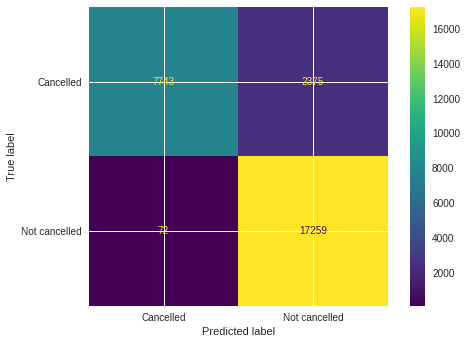

In [ ]:
#y = df["is_canceled"]
X = df.drop(['is_canceled'], axis=1)

minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

    Cancelled       1.00      0.87      0.93     10118
Not cancelled       0.93      1.00      0.96     17331

     accuracy                           0.95     27449
    macro avg       0.96      0.93      0.94     27449
 weighted avg       0.95      0.95      0.95     27449



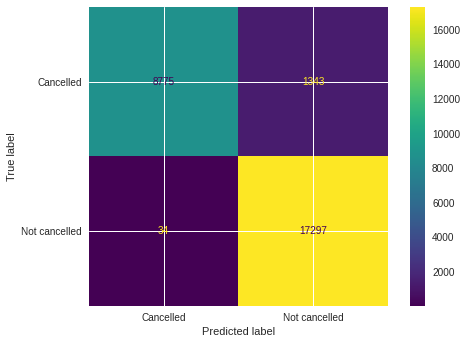

In [ ]:
X = df.drop(['is_canceled'], axis=1)

X =standardisation.fit_transform(X)
X = pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, predictions))

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##Model fine tuning

In [ ]:
# Identifty the best values for n_neighbors
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9043316696418813,
 0.9005792560749025,
 0.9056796240300193,
 0.9048781376370724,
 0.9048052752377136,
 0.9058982112280958,
 0.902510109657911,
 0.9040402200444461,
 0.9010164304710554,
 0.9015628984662465,
 0.8981383656963824,
 0.9001420816787497]

Text(0, 0.5, 'Accuracy')

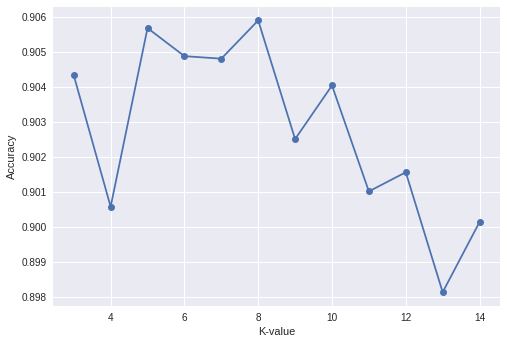

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

               precision    recall  f1-score   support

    Cancelled       0.94      0.82      0.88     10118
Not cancelled       0.90      0.97      0.94     17331

     accuracy                           0.92     27449
    macro avg       0.92      0.90      0.91     27449
 weighted avg       0.92      0.92      0.92     27449



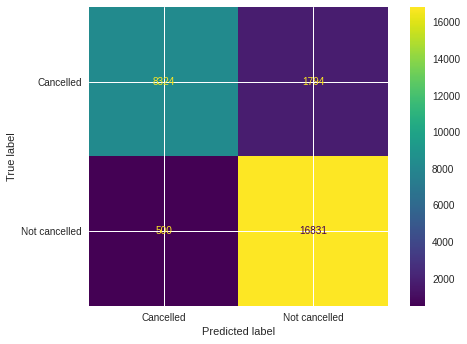

In [ ]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=5,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(kncdf, X_test, y_test)
print(classification_report(y_test, predictions))

svm

In [ ]:
from sklearn.svm import SVC

               precision    recall  f1-score   support

    Cancelled       1.00      0.89      0.94     10118
Not cancelled       0.94      1.00      0.97     17331

     accuracy                           0.96     27449
    macro avg       0.97      0.94      0.95     27449
 weighted avg       0.96      0.96      0.96     27449



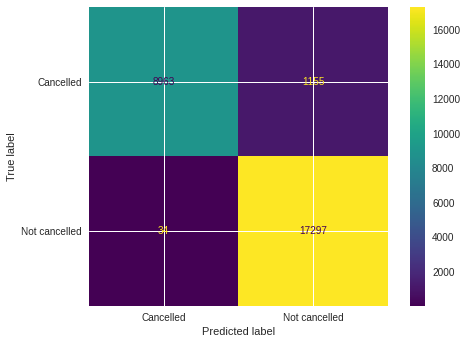

In [ ]:
clf = SVC(kernel='linear') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

    Cancelled       1.00      0.88      0.94     10118
Not cancelled       0.93      1.00      0.97     17331

     accuracy                           0.96     27449
    macro avg       0.97      0.94      0.95     27449
 weighted avg       0.96      0.96      0.95     27449



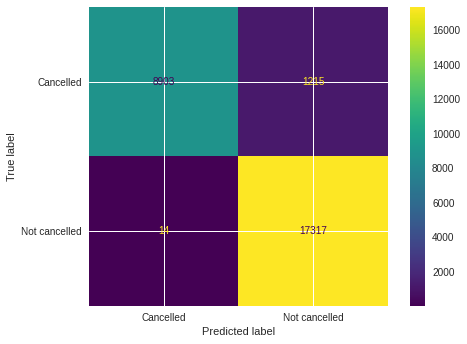

In [ ]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)
print(classification_report(y_test, predictions))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 9361   757]
 [  740 16591]]
               precision    recall  f1-score   support

    Cancelled       0.93      0.93      0.93     10118
Not cancelled       0.96      0.96      0.96     17331

     accuracy                           0.95     27449
    macro avg       0.94      0.94      0.94     27449
 weighted avg       0.95      0.95      0.95     27449



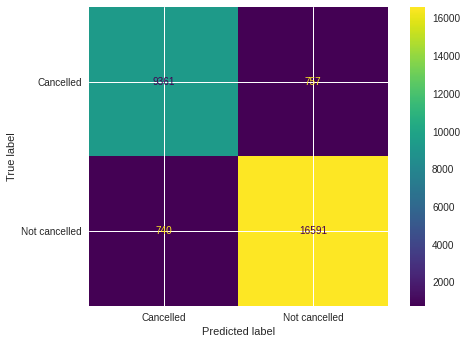

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dclf, X_test, y_test)

In [ ]:
pd.DataFrame(index = X.columns, data = dclf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
13,0.222044
4,0.120535
25,0.084177
1,0.075342
26,0.069826
9,0.052562
5,0.044699
22,0.042953
10,0.041840
20,0.041473


random forest

               precision    recall  f1-score   support

    Cancelled       0.97      0.91      0.94     10118
Not cancelled       0.95      0.99      0.97     17331

     accuracy                           0.96     27449
    macro avg       0.96      0.95      0.95     27449
 weighted avg       0.96      0.96      0.96     27449



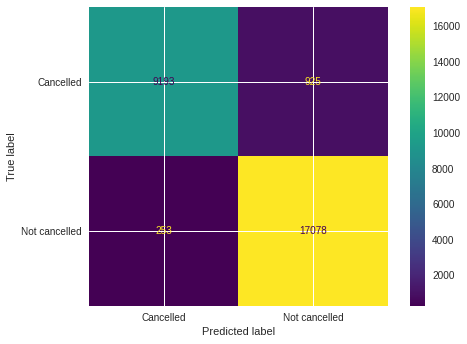

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndmclf=RandomForestClassifier(n_estimators=50)
model = rndmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(rndmclf, X_test, y_test)
print(classification_report(y_test, predictions))

In [ ]:
pd.DataFrame(index = X.columns, data = rndmclf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)


,Feature Importance
13,0.130741
1,0.093438
25,0.083026
9,0.081805
4,0.064708
26,0.059667
18,0.048332
5,0.045753
14,0.045190
20,0.044394


In [ ]:
X = df.drop(['Room','company','distribution_channel',
              'meal','arrival_date_year',
              'customer_type','is_canceled'
               ,'stays_in_weekend_nights','stays_in_week_nights'
              ,'days_in_waiting_list','market_segment','hotel'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

               precision    recall  f1-score   support

    Cancelled       0.98      0.92      0.95     10118
Not cancelled       0.96      0.99      0.97     17331

     accuracy                           0.97     27449
    macro avg       0.97      0.96      0.96     27449
 weighted avg       0.97      0.97      0.97     27449



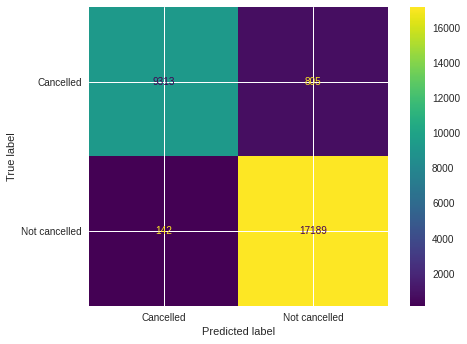

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndmclf=RandomForestClassifier(n_estimators=50)
model = rndmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(rndmclf, X_test, y_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

    Cancelled       0.73      0.39      0.51     10118
Not cancelled       0.72      0.91      0.81     17331

     accuracy                           0.72     27449
    macro avg       0.72      0.65      0.66     27449
 weighted avg       0.72      0.72      0.70     27449



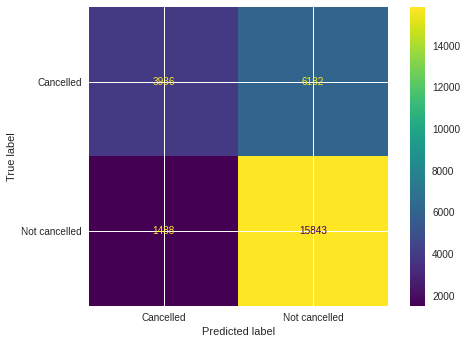

In [ ]:
clfr = SVC(kernel='rbf') 
model = clfr.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(clfr, X_test, y_test)
print(classification_report(y_test, predictions))

In [ ]:
#X.info()

Hyperparameter tuning with GridSerach

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,4))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [ ]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


               precision    recall  f1-score   support

    Cancelled       0.87      0.78      0.82     10118
Not cancelled       0.88      0.93      0.90     17331

     accuracy                           0.87     27449
    macro avg       0.87      0.85      0.86     27449
 weighted avg       0.87      0.87      0.87     27449



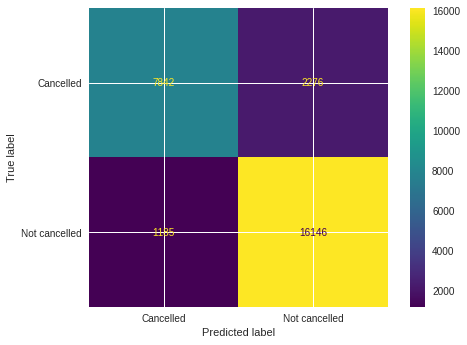

In [ ]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(kncdf, X_test, y_test)
print(classification_report(y_test, predictions))

Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt']
max_depth = []
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [500, 750, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [500, 750, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf = RandomForestClassifier(random_state = 42,n_estimators= 750,max_features='sqrt')


               precision    recall  f1-score   support

    Cancelled       0.99      0.92      0.95     10118
Not cancelled       0.95      0.99      0.97     17331

     accuracy                           0.97     27449
    macro avg       0.97      0.96      0.96     27449
 weighted avg       0.97      0.97      0.97     27449



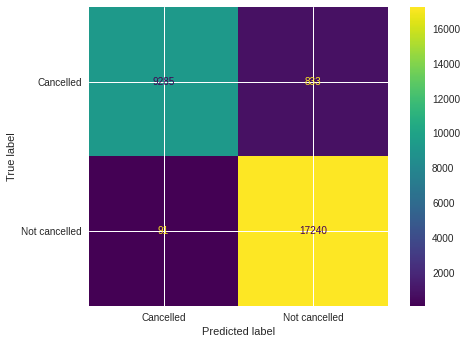

In [ ]:
model = rf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(rf, X_test, y_test)
print(classification_report(y_test, predictions))

In [ ]:
pd.DataFrame(index = X.columns, data = rf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
deposit_type,0.135270
reservation_month,0.111227
lead_time,0.106671
arrival_date_week_number,0.095452
country,0.081955
agent,0.075784
reservation_day,0.075409
adr,0.063047
arrival_date_day_of_month,0.060930
arrival_date_month,0.053374


###We have tried out different models and the accuracy scores for each of the model are as follows :

#####Logistic Regression : 95%
#####kNN : 92%
#####SVM (kernel - linear) : 96%
#####SVM (kernel - rbf) : 96%
#####Decision Tree Classifier : 95%
#####Random Forest Classifier : 96%

###We have also performed model fine tuning/hyperparameter tuning for the below models :

#####1) kNN – using GridSearchCV
#####Best Parameters: 
#####Best leaf_size: 1 Best p: 1 Best n_neighbors: 3
#####Accuracy : 87%

#####2) Random Forest Classifier – using RandomizedSearchCV
#####Best parameters : 
#####'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000
#####Accuracy : 97%

#####Random Forest Classifier after hyperparameter tuning gives the highest accuarcy of 97% and it is chosen as the best model.

In [ ]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
pd.DataFrame(index = X.columns, data = dclf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
deposit_type,0.222044
agent,0.120269
arrival_date_week_number,0.119349
reservation_month,0.097743
reservation_day,0.079119
lead_time,0.064313
arrival_date_day_of_month,0.054702
country,0.043766
total_of_special_requests,0.043022
net_cancelled,0.042953


               precision    recall  f1-score   support

    Cancelled       0.69      0.45      0.54     10118
Not cancelled       0.73      0.88      0.80     17331

     accuracy                           0.72     27449
    macro avg       0.71      0.66      0.67     27449
 weighted avg       0.71      0.72      0.70     27449



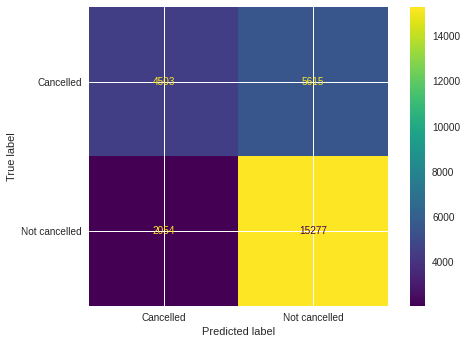

In [ ]:
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

    Cancelled       0.83      0.69      0.75     10118
Not cancelled       0.83      0.92      0.87     17331

     accuracy                           0.83     27449
    macro avg       0.83      0.80      0.81     27449
 weighted avg       0.83      0.83      0.83     27449



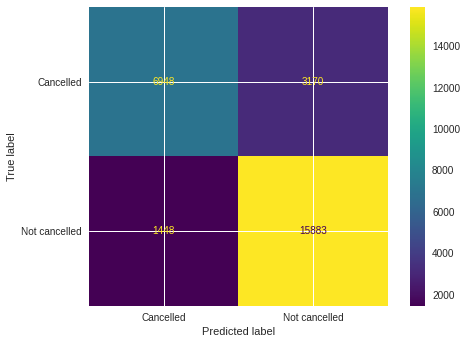

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcls = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
predictions = gbcls.predict(X_test)
plot_confusion_matrix(gbcls, X_test, y_test)
print(classification_report(y_test, predictions))

In [ ]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier', 
               "Support Vector Machive","KNN","Logistic Regression","Gradient Boosting"],

    'Score' : [dclf.score(X_test,y_test),rf.score(X_test,y_test), clfr.score(X_test,y_test), kncdf.score(X_test,y_test), lr.score(X_test,y_test),
               gbcls.score(X_test,y_test)]
    })

models.sort_values(by = 'Score', ascending = False)

In [ ]:
import plotly.express as px
models = models.sort_values(by=['Score'])
px.bar(data_frame = models, x = 'Score', y = 'Model', orientation='h', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

In [ ]:
pickle.dump(le1, open('countryEncoder.pkl', 'wb'))

In [ ]:
model = pickle.load(open('countryEncoder.pkl', 'rb'))